<a href="https://colab.research.google.com/github/hussainqadiim/-/blob/main/Used_Cars_Prices_in_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'used-cars-prices-in-uk:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3891476%2F6761207%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240214%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240214T140326Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3aafe4b4e776d1b740191e0f51a762b367ab07033e724e609fbf33beb99fd61a29d9f5dae02b317e39e7ef8080a256c36171448f5be6129ad79bd2fa5fd9e8b8b04118e6442499e11741651e6e6868690fb58623ebd4a12a5341b448a6c93b725a25a52bf274a282c4d7184733acc0de54192d7e4b98f0ce5d9f3159803d2e5c2cb126a6d278da3f2e810ec638402b651bc93063268badeb2f55f195dd3ec66b2c7c22280077881be2c6ff1a303f8141bd44a4f7260827fe4b9f8de88edc40591a34de724900a6c5419822dfb8151007581715f440ae8de892cc5fe6b5b3d17cfab683e3b187273e50dd8e8a9fba1662553a697de3cc6b3f8b202b5134700b01'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 52916 bytes downloaded
Downloaded and uncompressed: used-cars-prices-in-uk
Data source import complete.


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

pd.set_option("display.max_columns",None)

In [3]:
TARGET = "Price"

# Loading Data

In [4]:
df = pd.read_csv("/kaggle/input/used-cars-prices-in-uk/used_cars_UK.csv",index_col=0)
print(df.shape)
df.head(3)

(3685, 13)


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN


from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Mileage(miles)'].plot(kind='hist', bins=20, title='Mileage(miles)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Registration_Year'].plot(kind='hist', bins=20, title='Registration_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Previous Owners'].plot(kind='hist', bins=20, title='Previous Owners')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Fuel type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Engine').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Emission Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Price', y='Mileage(miles)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Mileage(miles)', y='Registration_Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Registration_Year', y='Previous Owners', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Previous Owners', y='Doors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mileage(miles)']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Mileage(miles)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mileage(miles)')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mileage(miles)']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Mileage(miles)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fuel type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fuel type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mileage(miles)')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mileage(miles)']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Mileage(miles)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Engine')):
  _plot_series(series, series_name, i)
  fig.legend(title='Engine', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mileage(miles)')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mileage(miles)']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Mileage(miles)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Emission Class')):
  _plot_series(series, series_name, i)
  fig.legend(title='Emission Class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mileage(miles)')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
_df_16['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Mileage(miles)'].plot(kind='line', figsize=(8, 4), title='Mileage(miles)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Registration_Year'].plot(kind='line', figsize=(8, 4), title='Registration_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Previous Owners'].plot(kind='line', figsize=(8, 4), title='Previous Owners')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Fuel type'].value_counts()
    for x_label, grp in _df_20.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('Fuel type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Engine'].value_counts()
    for x_label, grp in _df_21.groupby('Fuel type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fuel type')
_ = plt.ylabel('Engine')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Emission Class'].value_counts()
    for x_label, grp in _df_22.groupby('Engine')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Engine')
_ = plt.ylabel('Emission Class')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Service history'].value_counts()
    for x_label, grp in _df_23.groupby('Emission Class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Emission Class')
_ = plt.ylabel('Service history')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Price', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Fuel type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Price', y='Fuel type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Engine'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Price', y='Engine', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Emission Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Price', y='Emission Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Data Observation

## all

In [5]:
df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3685 entries, 0 to 4727
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3685 non-null   object 
 1   Price              3685 non-null   int64  
 2   Mileage(miles)     3685 non-null   int64  
 3   Registration_Year  3685 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3685 non-null   object 
 6   Body type          3685 non-null   object 
 7   Engine             3640 non-null   object 
 8   Gearbox            3685 non-null   object 
 9   Doors              3660 non-null   float64
 10  Seats              3650 non-null   float64
 11  Emission Class     3598 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 403.0+ KB


In [7]:
df.isnull().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

## Price

<Axes: xlabel='Price', ylabel='Count'>

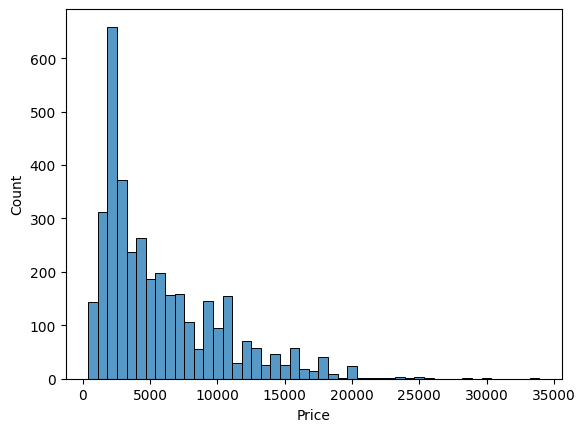

In [8]:
sns.histplot(df[TARGET])

## Mileage(miles)

In [9]:
df = df[df["Mileage(miles)"]<1000000]

<Axes: xlabel='Mileage(miles)', ylabel='Count'>

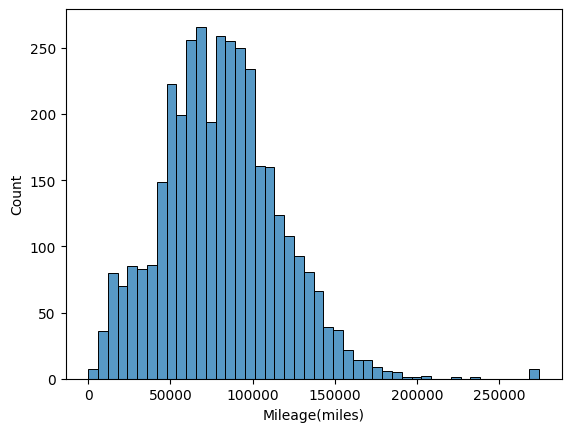

In [10]:
sns.histplot(df["Mileage(miles)"])

<Axes: xlabel='Mileage(miles)', ylabel='Price'>

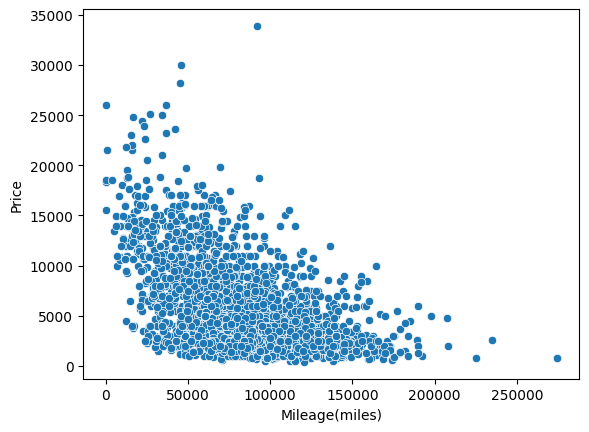

In [11]:
sns.scatterplot(x=df["Mileage(miles)"],y=df[TARGET])

# Registration_Year

<Axes: xlabel='Registration_Year', ylabel='Count'>

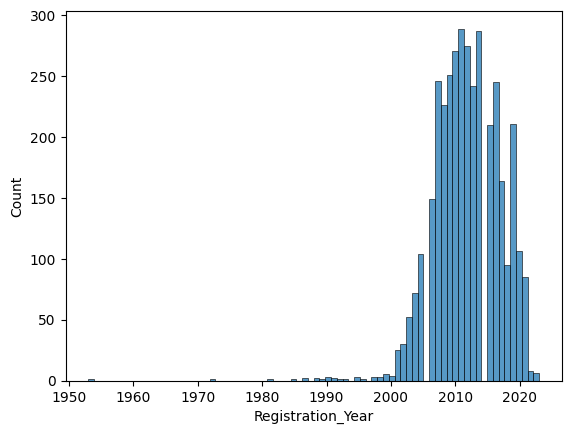

In [12]:
sns.histplot(df["Registration_Year"])

In [13]:
df["Registration_Year"].value_counts()

2011    289
2014    287
2012    275
2010    271
2009    251
2007    246
2016    245
2013    242
2008    226
2019    211
2015    210
2017    164
2006    149
2020    106
2005    104
2018     95
2021     85
2004     72
2003     52
2002     30
2001     25
2022      8
2023      6
1999      5
2000      4
1997      3
1990      3
1995      3
1998      3
1988      2
1987      2
1991      2
1972      1
1992      1
1996      1
1985      1
1981      1
1993      1
1989      1
1953      1
Name: Registration_Year, dtype: int64

<Axes: xlabel='Registration_Year', ylabel='Price'>

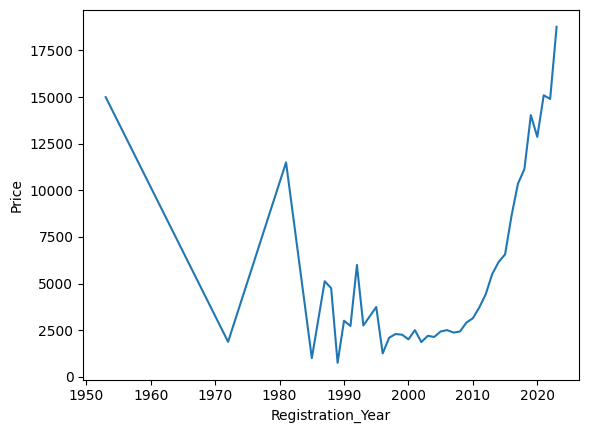

In [14]:
tmp_df = df.groupby("Registration_Year").agg({TARGET:"mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df[TARGET])

## Previous Owners

<Axes: xlabel='Previous Owners', ylabel='Count'>

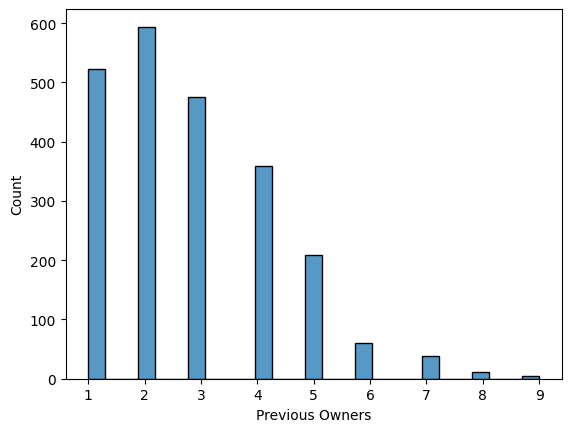

In [15]:
sns.histplot(df["Previous Owners"])

<Axes: xlabel='Previous Owners', ylabel='Price'>

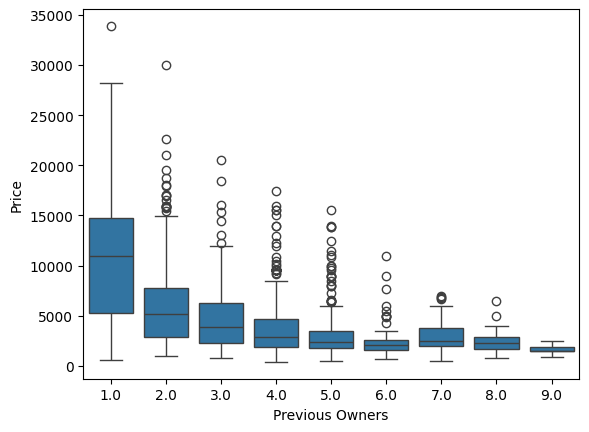

In [16]:
sns.boxplot(x=df["Previous Owners"],y=df[TARGET])

<Axes: xlabel='Previous Owners', ylabel='Price'>

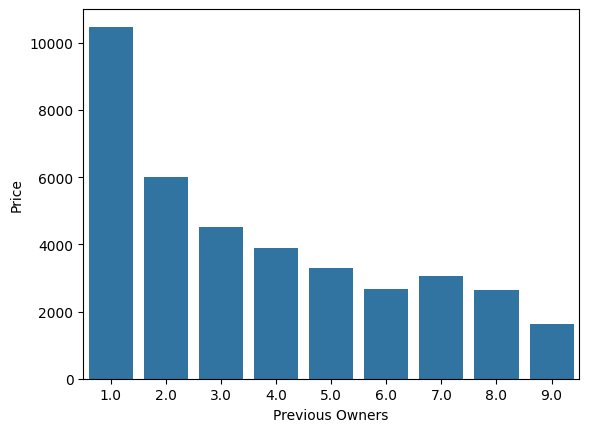

In [17]:
tmp_df = df.groupby("Previous Owners").agg({TARGET:"mean"})
sns.barplot(x=tmp_df.index,y=tmp_df[TARGET])

<Axes: xlabel='Previous Owners', ylabel='Registration_Year'>

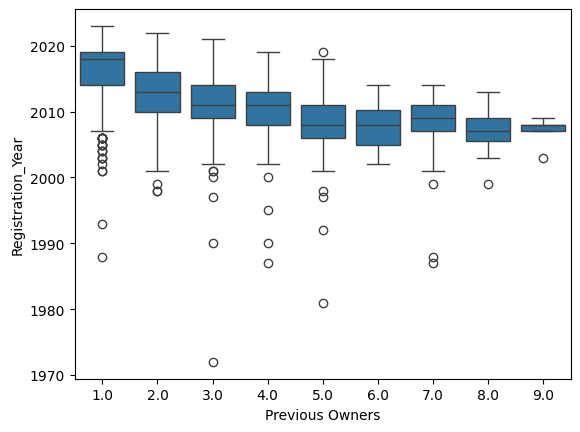

In [18]:
sns.boxplot(x=df["Previous Owners"],y=df["Registration_Year"])

## Fuel type

Petrol                   2360
Diesel                   1218
Petrol Hybrid              47
Electric                   31
Petrol Plug-in Hybrid      27
Diesel Hybrid               1
Name: Fuel type, dtype: int64


<Axes: xlabel='Fuel type', ylabel='Count'>

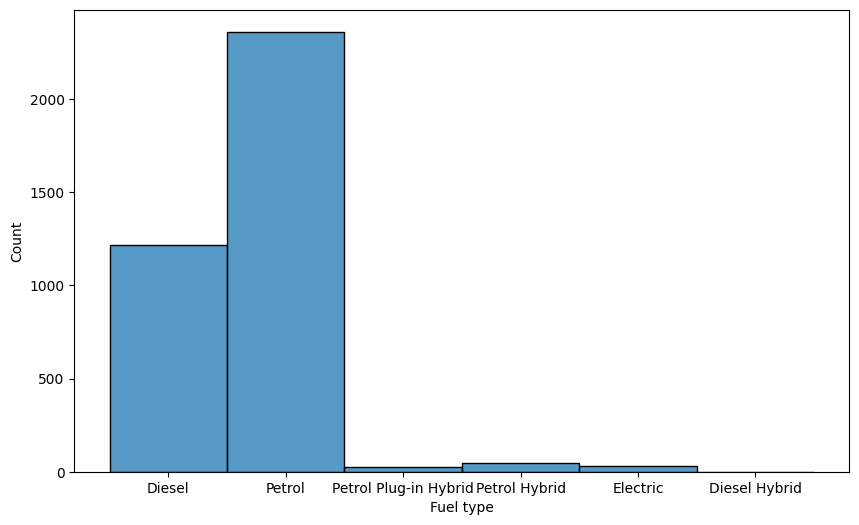

In [19]:
print(df["Fuel type"].value_counts())
plt.figure(figsize=(10,6))
sns.histplot(df["Fuel type"])

<Axes: xlabel='Fuel type', ylabel='Price'>

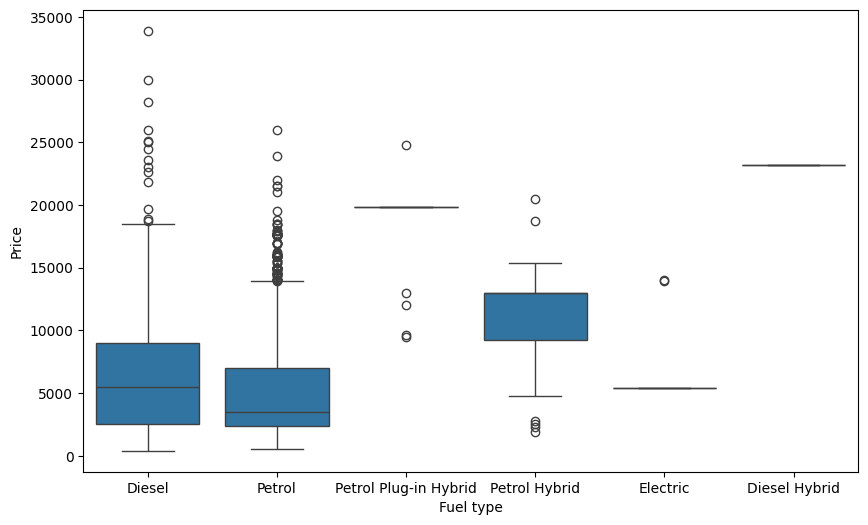

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Fuel type"],y=df[TARGET])

<Axes: xlabel='Fuel type', ylabel='Registration_Year'>

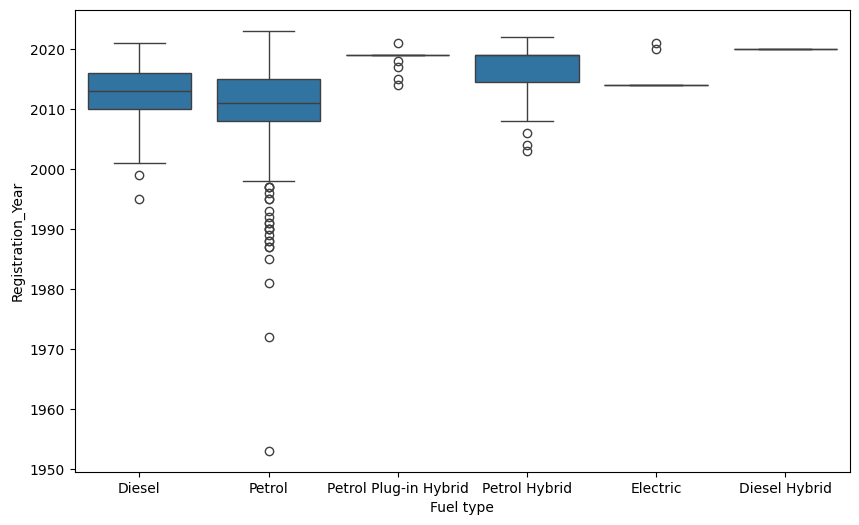

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Fuel type"],y=df["Registration_Year"])

## Body type

Hatchback      2278
SUV             460
Saloon          368
Estate          171
MPV             153
Coupe           139
Convertible     109
Pickup            3
Combi Van         2
Minibus           1
Name: Body type, dtype: int64


<Axes: xlabel='Body type', ylabel='Count'>

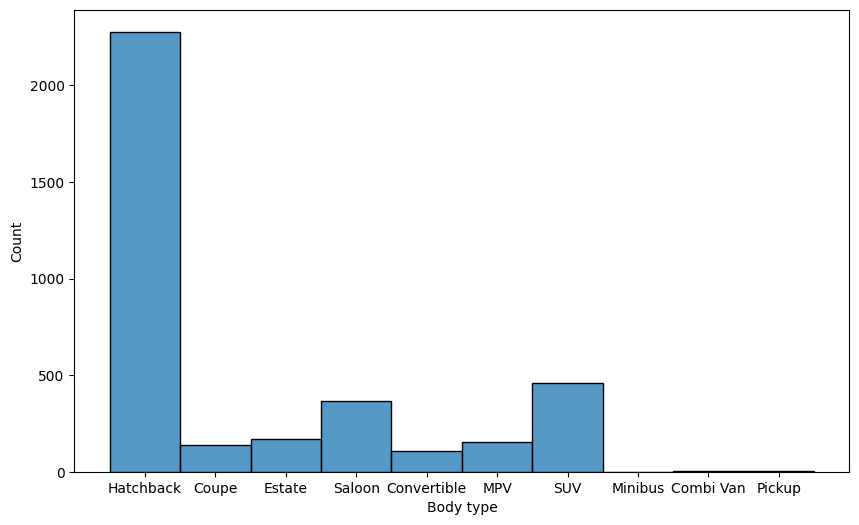

In [22]:
print(df["Body type"].value_counts())
plt.figure(figsize=(10,6))
sns.histplot(df["Body type"])

<Axes: xlabel='Body type', ylabel='Price'>

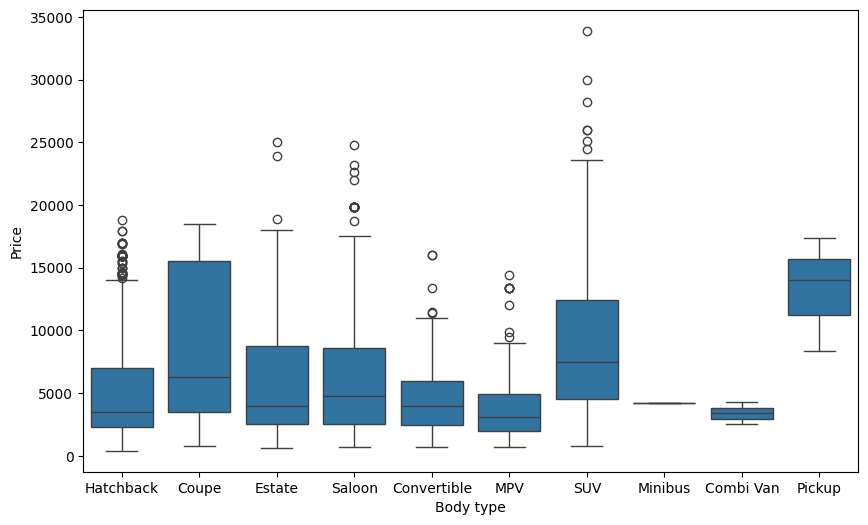

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Body type"],y=df[TARGET])

In [24]:
pd.crosstab(df["Body type"],df["Fuel type"],margins=True,normalize=True)

Fuel type,Diesel,Diesel Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid,All
Body type,,,,,,,
Combi Van,0.000543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000543
Convertible,0.004886,0.000000,0.000000,0.024701,0.000000,0.000000,0.029587
Coupe,0.016287,0.000000,0.000000,0.020901,0.000543,0.000000,0.037731
Estate,0.035559,0.000000,0.000000,0.010858,0.000000,0.000000,0.046417
Hatchback,0.128122,0.000000,0.008143,0.471498,0.010043,0.000543,0.618350
MPV,0.024973,0.000000,0.000000,0.016015,0.000543,0.000000,0.041531
Minibus,0.000000,0.000000,0.000000,0.000271,0.000000,0.000000,0.000271
Pickup,0.000814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000814
SUV,0.065689,0.000000,0.000271,0.058360,0.000543,0.000000,0.124864


## Engine

In [25]:
df["Engine"] = df["Engine"].str[:3].astype("float")

<Axes: xlabel='Engine', ylabel='Count'>

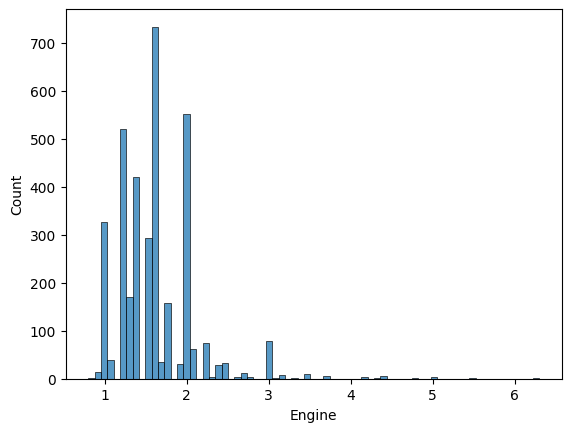

In [26]:
sns.histplot(df["Engine"])

<Axes: xlabel='Engine', ylabel='Price'>

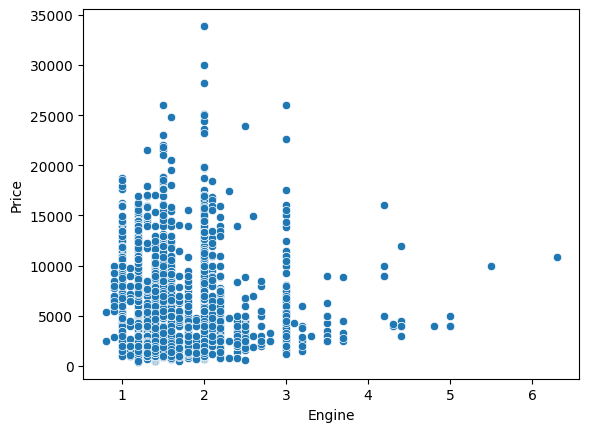

In [27]:
sns.scatterplot(x=df["Engine"],y=df[TARGET])

<Axes: xlabel='Fuel type', ylabel='Engine'>

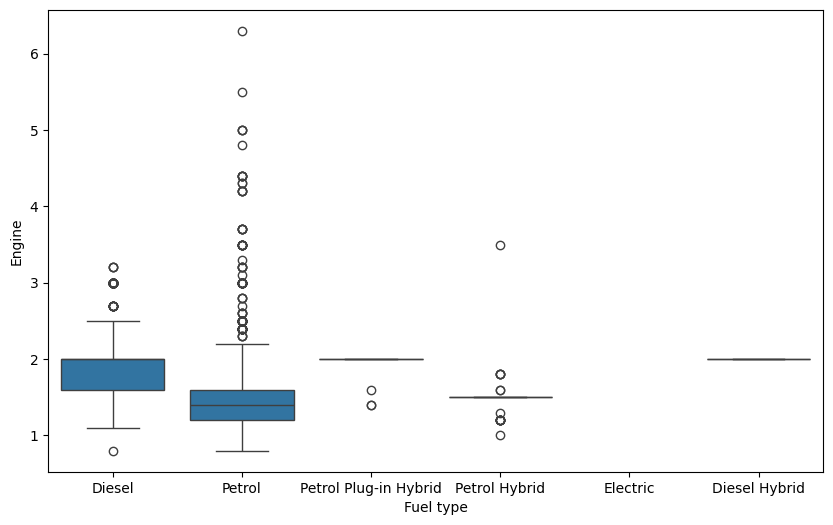

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Fuel type"],y=df["Engine"])

<Axes: xlabel='Body type', ylabel='Engine'>

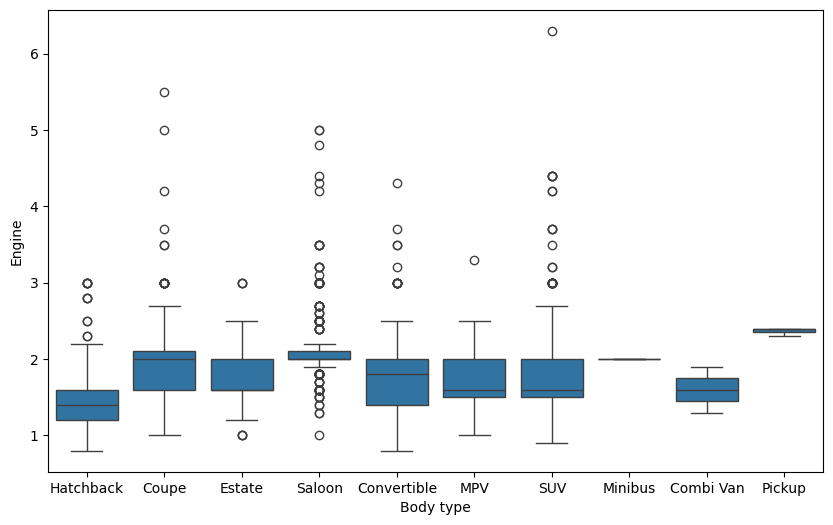

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Body type"],y=df["Engine"])

## Gearbox

In [30]:
df["Gearbox"].value_counts()

Manual       2868
Automatic     816
Name: Gearbox, dtype: int64

<Axes: xlabel='Gearbox', ylabel='Price'>

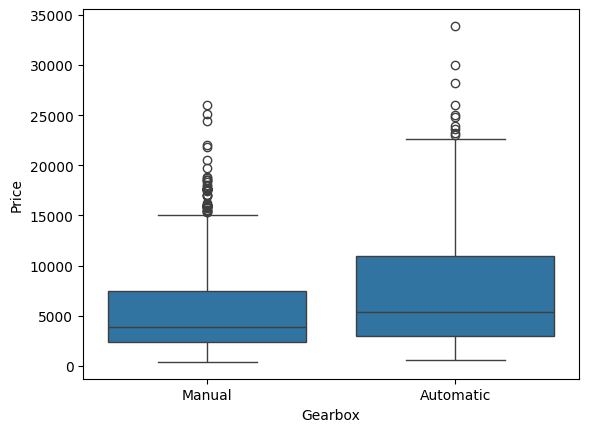

In [31]:
sns.boxplot(x=df["Gearbox"],y=df[TARGET])

<Axes: xlabel='Gearbox', ylabel='Registration_Year'>

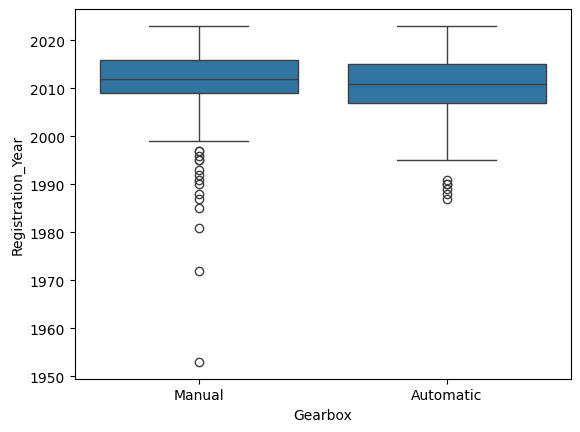

In [32]:
sns.boxplot(x=df["Gearbox"],y=df["Registration_Year"])

In [33]:
pd.crosstab(df["Fuel type"],df["Gearbox"],margins=True,normalize=True)

Gearbox,Automatic,Manual,All
Fuel type,,,
Diesel,0.091205,0.239414,0.330619
Diesel Hybrid,0.000271,0.000000,0.000271
Electric,0.008415,0.000000,0.008415
Petrol,0.105049,0.535559,0.640608
Petrol Hybrid,0.009229,0.003529,0.012758
Petrol Plug-in Hybrid,0.007329,0.000000,0.007329
All,0.221498,0.778502,1.000000


In [34]:
pd.crosstab(df["Body type"],df["Gearbox"],margins=True,normalize=True)

Gearbox,Automatic,Manual,All
Body type,,,
Combi Van,0.000000,0.000543,0.000543
Convertible,0.008415,0.021173,0.029587
Coupe,0.024701,0.013029,0.037731
Estate,0.013844,0.032573,0.046417
Hatchback,0.072476,0.545874,0.618350
MPV,0.012215,0.029316,0.041531
Minibus,0.000271,0.000000,0.000271
Pickup,0.000000,0.000814,0.000814
SUV,0.030130,0.094734,0.124864


## Doors

<Axes: xlabel='Doors', ylabel='Count'>

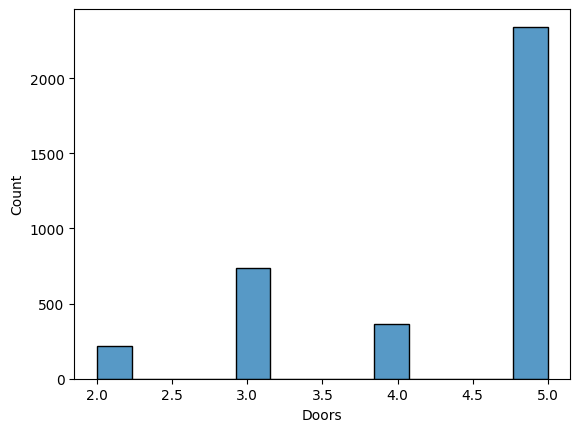

In [35]:
sns.histplot(df["Doors"])

<Axes: xlabel='Doors', ylabel='Price'>

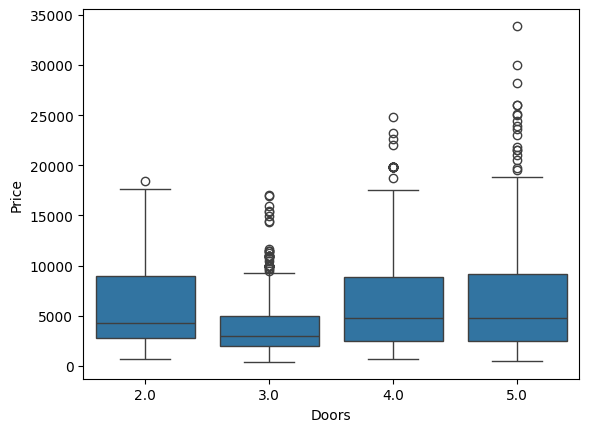

In [36]:
sns.boxplot(x=df["Doors"],y=df[TARGET])

## Seats

<Axes: xlabel='Seats', ylabel='Count'>

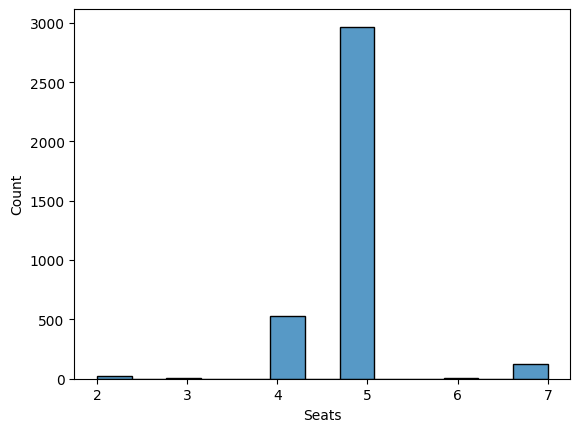

In [37]:
sns.histplot(df["Seats"])

<Axes: xlabel='Seats', ylabel='Price'>

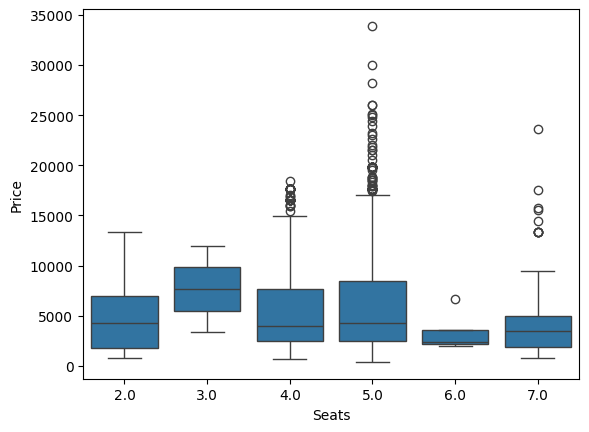

In [38]:
sns.boxplot(x=df["Seats"],y=df[TARGET])

In [39]:
pd.crosstab(df["Doors"],df["Seats"],margins=True,normalize=True)

Seats,2.0,3.0,4.0,5.0,6.0,7.0,All
Doors,,,,,,,
2.0,0.006320,0.000275,0.048640,0.002473,0.000000,0.000000,0.057708
3.0,0.000000,0.000275,0.070624,0.130530,0.000000,0.000000,0.201429
4.0,0.000000,0.000000,0.001374,0.097554,0.000000,0.000000,0.098928
5.0,0.000275,0.000000,0.025007,0.582578,0.001099,0.032976,0.641935
All,0.006595,0.000550,0.145644,0.813135,0.001099,0.032976,1.000000


#### Odd doors are oddly constructed.

## Emission Class

In [40]:
df["Emission Class"].value_counts()

Euro 5    1256
Euro 6    1108
Euro 4    1067
Euro 3     137
Euro 2      25
Euro 1       4
Name: Emission Class, dtype: int64

<Axes: xlabel='Emission Class', ylabel='Price'>

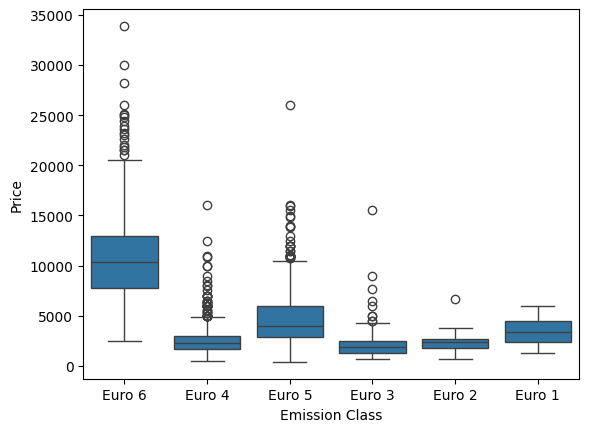

In [41]:
sns.boxplot(x=df["Emission Class"],y=df[TARGET])

<Axes: xlabel='Emission Class', ylabel='Registration_Year'>

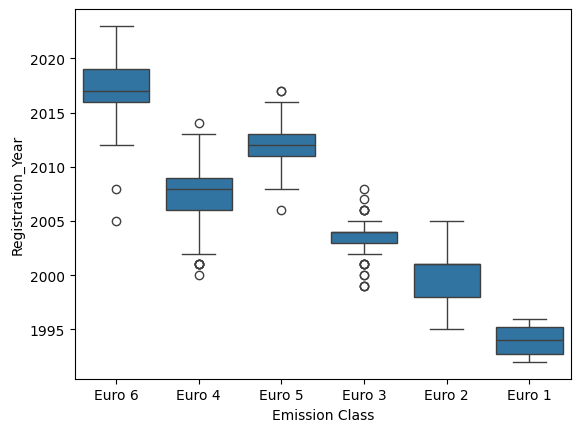

In [42]:
sns.boxplot(x=df["Emission Class"],y=df["Registration_Year"])

### 5.6 is exceptionally high. Recently manufactured ones tend to be 5.6
### What could be the reason why 1 is also high on average?

## Service history

In [43]:
df["Service history"].fillna("None",inplace=True)

<Axes: xlabel='Service history', ylabel='Price'>

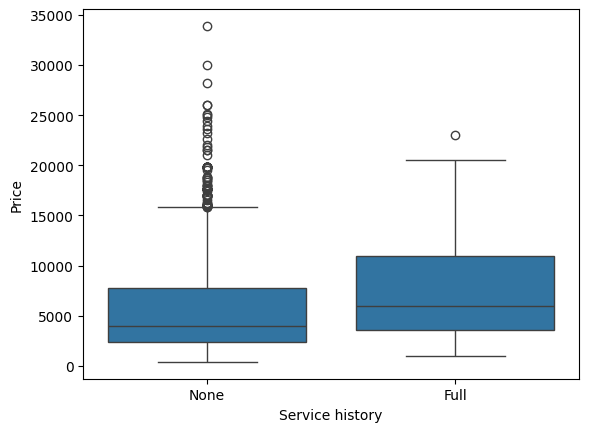

In [44]:
sns.boxplot(x=df["Service history"],y=df[TARGET])